# Анализ поведения клиентов телеком-компании

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Замена-типов-данных,-исправление-ошибок" data-toc-modified-id="Замена-типов-данных,-исправление-ошибок-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Замена типов данных, исправление ошибок</a></span></li><li><span><a href="#Объединение-таблиц" data-toc-modified-id="Объединение-таблиц-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Объединение таблиц</a></span></li><li><span><a href="#Выполнение-дополнительных-расчетов" data-toc-modified-id="Выполнение-дополнительных-расчетов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Выполнение дополнительных расчетов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Проверка-гипотезы-1" data-toc-modified-id="Проверка-гипотезы-1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Проверка гипотезы 1</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотезы-2" data-toc-modified-id="Проверка-гипотезы-2-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Проверка гипотезы 2</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

**Исходные данные:** 

В нашем распоряжении база данных 500 пользователей «Мегалайна» - федерального оператора сотовой связи: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

**1. Описание тарифов:**
    
    
**Тариф «Смарт»**
    
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 
    - минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); \
    - сообщение: 3 рубля; 
    - 1 Гб интернет-трафика: 200 рублей.

**Тариф «Ультра»**

1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 
    - минута разговора: 1 рубль; 
    - сообщение: 1 рубль;
    - 1 Гб интернет-трафика: 150 рублей.

**Примечание:**
* «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
* Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

**2. Описание данных:** 

Таблица `users` (информация о пользователях):
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tarif — название тарифного плана

Таблица `calls` (информация о звонках):
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

Таблица `messages` (информация о сообщениях):
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

Таблица `internet` (информация об интернет-сессиях):
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя
* Таблица tariffs (информация о тарифах):
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Таблица `tariffs` (информация о тарифах):
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

**Цель** — проанализировать поведение клиентов и сделать вывод, какой тариф лучше.

**Задачи:**
* Открыть файл с данными и изучить общую информацию;
* Подготовить данные для анализа;
* Проанализировать данные;
* Проверить гипотезы;
* Подвести итоги исследования.

# План работы

**Шаг 1. Откройте файл с данными и изучите общую информацию**

Путь к файлам:
* /datasets/calls.csv
* /datasets/internet.csv
* /datasets/messages.csv
* /datasets/tariffs.csv
* /datasets/users.csv

**Шаг 2. Подготовьте данные**
* Приведите данные к нужным типам;
* Найдите и исправьте ошибки в данных, если они есть.

Поясните, какие ошибки вы нашли и как их исправили. В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

Посчитайте для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

**Шаг 3. Проанализируйте данные**

Опишите поведение клиентов оператора, исходя из выборки:
* Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
* Посчитайте среднее количество, дисперсию и стандартное отклонение. 
* Постройте гистограммы. 
* Опишите распределения.

**Шаг 4. Проверьте гипотезы**

* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Пороговое значение alpha задайте самостоятельно.

Поясните:
* как вы формулировали нулевую и альтернативную гипотезы;
* какой критерий использовали для проверки гипотез и почему.

**Шаг 5. Напишите общий вывод**

## Изучение данных

In [43]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import statsmodels.api as sm

In [2]:
df_users = pd.read_csv('/datasets/users.csv') # 
df_calls = pd.read_csv('/datasets/calls.csv')
df_message = pd.read_csv('/datasets/messages.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_tariff = pd.read_csv('/datasets/tariffs.csv')


# выведем первые и последние 5 строк и информацию по каждой таблице:
table = [df_users, df_calls, df_message, df_internet, df_tariff] # перечень таблиц
table_name = ['users.csv','calls.csv','messages.csv','internet.csv','tariffs.csv'] # перечень наименований таблиц

for index in range(len(table)):
    print('Наименование таблицы - ', table_name[index], sep='')
    display(table[index])
    display(table[index].info(), 
            table[index].describe())

Наименование таблицы - users.csv


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Наименование таблицы - calls.csv


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Наименование таблицы - messages.csv


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


Наименование таблицы - internet.csv


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Наименование таблицы - tariffs.csv


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


**Описание данных таблиц:**

**1. Таблица `users` (информация о пользователях):**
* Cостоит из 500 строк и 8 столбцов;
* Описание данных в столцах приведено выше;
* Тип данных: столбцы `churn_date` и `reg_date` содежат информацию о датах прекращения и подключения тарифов. Однако данная информация для текущего исследования не потребуется. Предлагаем не проводить изменение типа данных столбцов на `datetime`;
* Нулевые значения: `churn_date` имеет пропуски, однако, обращаясь к документации: если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Ничего менять и заполнять не нужно.

**2. Таблица `calls` (информация о звонках):**
* Cостоит из 202 607 строк и 4 столбцов;
* Описание данных в столцах приведено выше;
* Тип данных: 
    - столбец `call_date` - дата звонка - имеет тип `object`. Необходимо изменить тип данных `object` -> `datetime`;
    - столбец `duration` — длительность звонка в минутах. По условиям тарифов, длительность каждого звонка округляется до целых значений в большую сторону, поэтому данные можно сразу округлить и привести к типу `int`. 
* Нулевые значения: отсутствуют;
* Имеется большой разброс по длительности разговоров пользователей.

**3. Таблица `message` (информация о сообщениях):**
* Cостоит из 123 036 строк и 3 столбцов;
* Описание данных в столцах приведено выше;
* Тип данных: столбец `message_date` - дата сообщения - имеет тип `object`. Необходимо изменить тип данных `object` -> `datetime`;
* Нулевые значения: отсутствуют;

**4. Таблица `internet` (информация об интернет-сессиях):**
* Cостоит из 149 396 строк и 5 столбцов;
* Описание данных в столцах приведено выше;
* Тип данных: 
    - столбец `session_date` - дата интернет-сессии - имеет тип `object`. Необходимо изменить тип данных `object` -> `datetime`;
    - столбец `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах). По условиям тарифов, для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Поэтому пока тип данных менять не нужно;
* Нулевые значения: отсутствуют;
* Столбец `Unnamed: 0` является, по всей видимости, стобцом индексов. В данном случае он дублирует уже имеющийся столбец индексов, автоматически созданный при открытии книги. Предлается его удалить.

**Таблица `tariffs` (информация о тарифах):**
* Cостоит из 2 строк и 8 столбцов;
* Описание данных в столцах приведено выше;
* Тип данных: все столбцы, на первый взгляд, имеют корректный тип данных.


### Вывод

1. Приведены 5 таблиц с данными 500 пользователей;
2. В некоторых таблицах Python некорректно отпределил тип данных. Необходима корректировка:
    
    2.1 Таблица `users`:  тип данных столбцах `churn_date` и `reg_date` предлагается не менять;
    
    2.2 Таблица `calls`: 
    - столбец `call_date` - дата звонка - имеет тип `object`. Необходимо изменить тип данных `object` -> `datetime`;
    - столбец `duration` — длительность звонка в минутах. По условиям тарифов, длительность каждого звонка округляется до целых значений в большую сторону, поэтому данные можно сразу округлить (в большую сторону) и привести к типу `int`;
    
    2.3 Таблица `messages`: в столбце `message_date` - дата сообщения - необходимо изменить тип данных `object` -> `datetime`;
    
    2.4 Таблица `internet`: столбец `session_date` - дата интернет-сессии - имеет тип `object`. Необходимо изменить тип данных `object` -> `datetime`;

3. Далее переименуем столбцы:
    * с датами `call_date`, `message_date`, `session_date` на `date`;
    * с данными `mb_used`, `duration` на `value`.
    
4. Соединим таблицы `calls`, `messages`, `internet` в одну,
5. Добавим расчетный столбец с номером месяца
6. Дообогатим таблицу данными из `users` и `tariff`
7. Произведем дополнительные расчеты:
    * количество сделанных звонков и израсходованных минут разговора по месяцам;
    * количество отправленных сообщений по месяцам;
    * объем израсходованного интернет-трафика по месяцам;
    * помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

## Подготовка данных

### Замена типов данных, исправление ошибок

* замена типа на `datetime` и `int` (для последнего округлим предварительно вверх значение столбца).
* удаление столбца `Unnamed: 0` в датафрейме `df_internet`
* переименуем столбцы:
    - с датами `call_date`, `message_date`, `session_date` на `date`;
    - с данными `mb_used`, `duration` на `value`.
* дополнительно циклом добавим каждой таблице столбец-признак данных

In [3]:
# 1. в столбце duration методом apply округлим вверх и заменим тип данных на Int
df_calls['duration'] = df_calls['duration'].apply(np.ceil).astype(int)

# 2. Удаление столбца `Unnamed: 0` в датафрейме df_internet
df_internet = df_internet.drop(['Unnamed: 0'], axis=1)

In [4]:
# циклом пройдем по необходимым столбцам таблиц для замены на тип datetime и добавим столбец-признак данных
table = [df_calls, df_internet, df_message] # перечень исходных таблиц
column_date = ['call_date', 'session_date', 'message_date'] # перечень столбцов для замены типа данных
table_type = ['звонок', 'интернет', 'сообщение'] # перечень столбцов-признаков данных
column_name_new = [['id', 'date', 'value', 'user_id'], 
                   ['id', 'value', 'date', 'user_id'],
                   ['id', 'date', 'user_id']] # перечень наименований новых столбцов

for index in range(len(table)):
    
    # изменение типа данных столбца на datetime
    table[index][column_date[index]] = pd.to_datetime(table[index][column_date[index]], format='%Y-%m-%d')
    
    # переименуем столбцы
    table[index].columns=column_name_new[index]
    
    # добавление столбца-признака данных
    table[index]['type'] = table_type[index]

### Объединение таблиц

Соединим таблицы с информацией о звонках, смс и интернет-сессиях в один датафрейм, дообогатим его информацией о пользовательских тарифных планах:
* с помощью метода `.concat()` соберем 3 таблицы (`df_calls`, `df_messages`, `df_internet`) в одну
* в столбце `value` пропуски заполним на `1`, т.к. там остались пропуски от таблицы `df_messages` с отправленными сообщениями
* добавим номер месяца по дате
* добавим инфо о пользователях из таблиц `users` c помощью метода `.merge`

In [5]:
# с помощью метода .concat() соберем 3 таблицы (df_calls, df_messages, df_internet) в одну
df = pd.concat(table, sort=False, ignore_index=False)

# в столбце value пропуски заполним на 1, т.к. там остались пропуски от таблицы df_messages с отправленными сообщениями
df['value'] = df['value'].fillna(1)

# добавим номер месяца по дате
df['month'] = df['date'].dt.month

# добавим инфо о пользователях из таблиц users c помощью метода .merge
df = df.merge(df_users, how='left', on='user_id')
df

,id,date,value,user_id,type,month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000_0,2018-07-25,0.0,1000,звонок,7,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000_1,2018-08-17,0.0,1000,звонок,8,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000_2,2018-06-11,3.0,1000,звонок,6,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000_3,2018-09-21,14.0,1000,звонок,9,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000_4,2018-12-15,6.0,1000,звонок,12,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475034,1499_179,2018-12-12,1.0,1499,сообщение,12,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
475035,1499_180,2018-09-28,1.0,1499,сообщение,9,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
475036,1499_181,2018-09-27,1.0,1499,сообщение,9,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
475037,1499_182,2018-11-15,1.0,1499,сообщение,11,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


### Выполнение дополнительных расчетов

С помощью сводной таблицы рассчитаем:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;

Из таблицы `tariffs` получим информацию по тарифу и добавим в сводную таблицу, рассчитаем:
* помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [6]:
# построим сводную таблицу
df_pivot = pd.pivot_table(data=df, 
                          values='value', 
                          index=['user_id', 'city', 'month', 'tariff'], 
                          columns='type', 
                          aggfunc='sum',
                          fill_value=0) # важный параметр!
df_pivot.head(20)

type                              звонок  интернет  сообщение
user_id city        month tariff                             
1000    Краснодар   5     ultra      159   2253.49         22
                    6     ultra      172  23233.77         60
                    7     ultra      340  14003.64         75
                    8     ultra      408  14055.93         81
                    9     ultra      466  14568.91         57
                    10    ultra      350  14702.49         73
                    11    ultra      338  14756.47         58
                    12    ultra      333   9817.61         70
1001    Москва      11    smart      430  18429.34          0
                    12    smart      414  14036.66          0
1002    Стерлитамак 6     smart      117  10856.82          4
                    7     smart      214  17580.10         11
                    8     smart      289  20319.26         13
                    9     smart      206  16691.08          4
                    10    smart      212  13888.25         10
                    11    smart      243  18587.28         16
                    12    smart      236  18113.73         12
1003    Москва      8     ultra      380   8565.21         37
                    9     ultra      961  12468.87         91
                    10    ultra      855  14768.14         83

In [7]:
# превратим сводную в датафрейм
df_pivot = df_pivot.reset_index()
df_pivot

type,user_id,city,month,tariff,звонок,интернет,сообщение
0,1000,Краснодар,5,ultra,159,2253.49,22
1,1000,Краснодар,6,ultra,172,23233.77,60
2,1000,Краснодар,7,ultra,340,14003.64,75
3,1000,Краснодар,8,ultra,408,14055.93,81
4,1000,Краснодар,9,ultra,466,14568.91,57
...,...,...,...,...,...,...,...
3209,1498,Владикавказ,10,smart,247,20579.36,42
3210,1499,Пермь,9,smart,70,1845.75,11
3211,1499,Пермь,10,smart,449,17788.51,48
3212,1499,Пермь,11,smart,612,17963.31,59


In [8]:
# добавим информацию о тарифе c помощью метода .merge
df_pivot = df_pivot.merge(df_tariff, how='left', left_on='tariff', right_on='tariff_name')
df_pivot

,user_id,city,month,tariff,звонок,интернет,сообщение,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,Краснодар,5,ultra,159,2253.49,22,1000,30720,3000,1950,150,1,1,ultra
1,1000,Краснодар,6,ultra,172,23233.77,60,1000,30720,3000,1950,150,1,1,ultra
2,1000,Краснодар,7,ultra,340,14003.64,75,1000,30720,3000,1950,150,1,1,ultra
3,1000,Краснодар,8,ultra,408,14055.93,81,1000,30720,3000,1950,150,1,1,ultra
4,1000,Краснодар,9,ultra,466,14568.91,57,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,Владикавказ,10,smart,247,20579.36,42,50,15360,500,550,200,3,3,smart
3210,1499,Пермь,9,smart,70,1845.75,11,50,15360,500,550,200,3,3,smart
3211,1499,Пермь,10,smart,449,17788.51,48,50,15360,500,550,200,3,3,smart
3212,1499,Пермь,11,smart,612,17963.31,59,50,15360,500,550,200,3,3,smart


In [9]:
# рассчитаем выручку по каждому пользователю в месяц
def revenue (row):
    
    # задаём переменные
    call = row['звонок'] # факт звонков
    call_inc = row['minutes_included'] # включено звонков
    
    internet = row['интернет'] # факт интернета
    internet_inc = row['mb_per_month_included'] # включено интернета
    
    message = row['сообщение'] # факт сообщений
    message_inc = row['messages_included'] # включено звонков
    
    fee = row['rub_monthly_fee'] # ежемесячная плата
    revenue = 0
        
    if  call <= call_inc:
        revenue += 0
    else:
        revenue += (call - call_inc)*row['rub_per_minute']
        
    if  internet <= internet_inc:
        revenue += 0
    else:
        revenue += np.ceil((internet - internet_inc)/1024)*row['rub_per_gb']
        
    if  message <= message_inc:
        revenue += 0    
    else:
        revenue += (message - message_inc)*row['rub_per_message']
    
    revenue += fee
    
    return revenue

df_pivot['revenue'] = df_pivot.apply(revenue, axis=1)
df_pivot

,user_id,city,month,tariff,звонок,интернет,сообщение,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,revenue
0,1000,Краснодар,5,ultra,159,2253.49,22,1000,30720,3000,1950,150,1,1,ultra,1950.0
1,1000,Краснодар,6,ultra,172,23233.77,60,1000,30720,3000,1950,150,1,1,ultra,1950.0
2,1000,Краснодар,7,ultra,340,14003.64,75,1000,30720,3000,1950,150,1,1,ultra,1950.0
3,1000,Краснодар,8,ultra,408,14055.93,81,1000,30720,3000,1950,150,1,1,ultra,1950.0
4,1000,Краснодар,9,ultra,466,14568.91,57,1000,30720,3000,1950,150,1,1,ultra,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,Владикавказ,10,smart,247,20579.36,42,50,15360,500,550,200,3,3,smart,1750.0
3210,1499,Пермь,9,smart,70,1845.75,11,50,15360,500,550,200,3,3,smart,550.0
3211,1499,Пермь,10,smart,449,17788.51,48,50,15360,500,550,200,3,3,smart,1150.0
3212,1499,Пермь,11,smart,612,17963.31,59,50,15360,500,550,200,3,3,smart,1513.0


### Вывод

1. Были выгружены 5 таблиц с данными пользователей;
2. Данные в таблицах приведены к нужным типам;
3. Выявлены и исправлены ошибки в данных;
4. Для каждого пользователя рассчитаны:
    - количество сделанных звонков и израсходованных минут разговора по месяцам;
    - количество отправленных сообщений по месяцам;
    - объем израсходованного интернет-трафика по месяцам;
    - помесячная выручка с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

## Анализ данных

Необходимо описать поведение клиентов оператора, исходя из выборки:

* Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
* Посчитайте среднее количество, дисперсию и стандартное отклонение.
* Постройте гистограммы.
* Опишите распределения.

In [10]:
# присвоим переменным data_smart и data_ultra срезы датафрейма df_pivot по каждому тарифу
data_smart = df_pivot.loc[df_pivot['tariff'] == 'smart',
                          ['звонок','интернет','сообщение','revenue']]# 
data_ultra = df_pivot.loc[df_pivot['tariff'] == 'ultra',
                          ['звонок','интернет','сообщение','revenue']]

In [22]:
# в сводной таблице рассчитаем суммы, среднего, дисперсии и стандартного отклонения по каждому тарифу
data_statistics = df_pivot.pivot_table(index='tariff',                         
                    values=('звонок','интернет','сообщение','revenue'), aggfunc=('sum', 'mean', 'var', 'std')) 
data_statistics

revenue                             звонок                             \
          mean    std        sum       var   mean    std       sum       var   
tariff                                                                         
smart  1289.97 818.40 2875351.00 669785.71 417.93 190.31 931577.00  36219.32   
ultra  2070.15 376.19 2039100.00 141516.75 526.62 317.61 518724.00 100873.63   

       интернет                                   сообщение                 \
           mean      std         sum          var      mean   std      sum   
tariff                                                                       
smart  16208.39  5870.48 36128494.60  34462496.46     33.38 28.23 74413.00   
ultra  19468.81 10087.17 19176773.13 101751013.78     49.36 47.80 48623.00   

                
           var  
tariff          
smart   796.81  
ultra  2285.27

Видно, что пользователи с тарифом "Ultra" пользуются услугами связи чаще, чем с тарифом "Smart", как в плане звонков, так и интернетом, смс-сообщениями. При этом разброс значений (ст.отклонение) по объему услуг у пользователей с тарифом "Ultra" намного выше.

* Суммарная выручка по тарифам:
        - "Ultra" - 2 039 100 руб.;
        - "Smart" - 2 875 351 руб.
* Выручка на человека по тарифам:
        - "Ultra" - 2070.15 руб./чел;
        - "Smart" - 1289.97 руб./чел.

Несмотря на то, что абсолютная выручка по тарифам "Smart" выше, чем по "Ultra", `отдача` на единицу (человека/тариф) по тарифу "Ultra" выше на 61%.

Построим гистограммы распределения по видам связи:

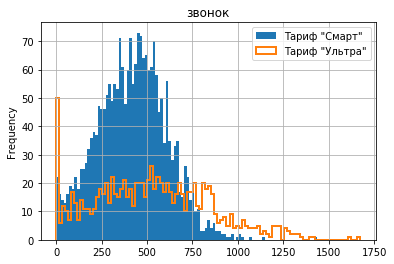

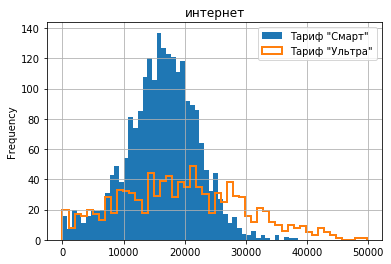

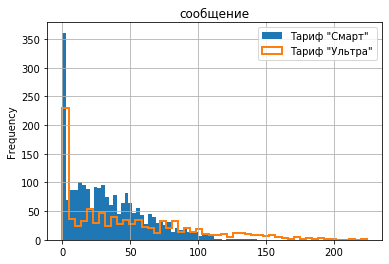

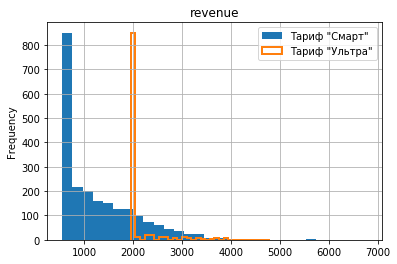

In [47]:
# напишем цикл для построения гистограмм по каждому тарифу
column_name = ['звонок','интернет','сообщение','revenue']
bins_num = [100,50,50,30]
    
for num in range(len(column_name)):
    
    # гистограмма тарифа Смарт
    ax = data_smart[column_name[num]].plot(kind='hist', 
                                           title=column_name[num],
                                           bins=bins_num[num],
                                           grid=True, 
                                           legend=True,
                                           label='Тариф "Смарт"')
    # гистограмма тарифа Ультра
    data_ultra[column_name[num]].plot(kind='hist',
                                      histtype='step',
                                      bins=bins_num[num],
                                      grid=True,
                                      linewidth=2,
                                      ax=ax,
                                      legend=True,
                                      label='Тариф "Ультра"')
    
    plt.show()
    print()

### Вывод

1. В месяц пользователи "Мегалайн" тарифов "Smart" и "Ultra" пользуются мобильной связью по-разному. В целом, абоненты с тарифом "Ultra" пользуются услугами связи чаще, чем с тарифом "Smart", как в плане звонков, так и интернетом, смс-сообщениями. 

2. Среднее количество использованных:
    * минут: "Ultra" - 527 мин., "Smart" - 418 мин.;
    * ГБ: "Ultra" - 19,5 ГБ, "Smart" - 16 Гб;
    * сообщений: "Ultra" - 49 шт, "Smart" - 36 шт;
    
       
  2.1 Суммарная выручка по тарифам:
  - "Ultra" - 2 039 100 руб.;
  - "Smart" - 2 875 351 руб.
    
  2.2 Средняя выручка на человека по тарифам:
  - "Ultra" - 2070.15 руб./чел;
  - "Smart" - 1289.97 руб./чел.

Несмотря на то, что абсолютная выручка по тарифам "Smart" выше, чем по "Ultra", отдача на единицу (человека/тариф) по тарифу "Ultra" выше на 61%.

3. Были построены гистограммы:
* Распределения кол-ва использованных минут и объема интернет-трафика имеют колокообразную форму нормального распределения у обоих тарифов. 
* Гистограммы СМС-сообщений и выручки имеют скошенность вправо, но нет повода утверждать, что они не распределены нормально. 

Стоит отметить, что на всех графиках присутствуют выбросы и аномальные значения.

## Проверка гипотез

Необходимо проверить следующие гипотезы:
* `Гипотеза 1` - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* `Гипотеза 2` - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### Проверка гипотезы 1

Для проверки `гипотезы 1` сформулируем нулевую и альтернативную гипотезы. Как правило, в статистике нулевую гипотезу Н_0 формулируют таким образом, чтобы был знак равенства. Для этого приравняем выручку тарифов «Ультра» и «Смарт»:
* **Нулевая гипотеза (H_0):** средняя выручка пользователей тарифов «Ультра» равна «Смарт» (одинаковая).
* Тогда **двусторонняя альтернативная гипотеза Н_1:** (двусторонняя, потому что мы заранее  не знаем, в какую - большую или меньшую - сторону будет отклонение средней выручки) будет звучать: средняя выручка пользователей тарифов «Ультра» не равна «Смарт» (отличается).

Для проверки нулевой гипотезы (Н_0) о равенстве среднего двух выборок используем `t-test Стьюдента`, предварительно проверив некоторые условия его использования:
    
   * наши выборки не зависят друг от друга;
   * выборочные средние нормально распределены - подтверждается гистограммой из п.3;
   * выборки разного размера и дисперсии рассматриваемых выборок **НЕ** равны, поэтому при проведении `t-test'a` укажем в аргументе `equal_var = False`. Тест посчитает дисперсии выборок по отдельности.

In [14]:
alpha = .05 # критический уровень статистической значимости 5% - стандартно :))
            # если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    data_smart['revenue'], 
    data_ultra['revenue'],
    equal_var = False) # параметр equal_var, тест посчитает дисперсии выборок по отдельности

print('p-значение: ', results.pvalue) # p-value - кф, характеризующий вероятность получить
print('Статистика разности: ', results.statistic) # наблюдаемый результат при условии, что нулевая гипотеза Н_0 верна
                                      # в нашем случае наблюдаемый результат - равенство средний двух выборок

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.2606313931076085e-250
Статистика разности:  -37.019021231454644
Отвергаем нулевую гипотезу


#### Вывод

Проведя t-test Стьюдента мы получили `p-значение:  4.2606313931076085e-250`, что характеризует крайне низкую вероятность получить наблюдаемый результат при условии, что нулевая гипотеза `Н_0` верна. Этот же вывод подтверждает статистика разности величиной `-37 стандартных отклонения (в левую сторону)!`. 

На критическом уровене статистической значимости 5% мы отвергаем нулевую гипотезу `Н_0` "О равенстве средней выручки пользователей тарифов «Ультра» и «Смарт»".

### Проверка гипотезы 2

Для проверки гипотезы 2 также сформулируем нулевую и альтернативную гипотезы:
* **Нулевая гипотеза (H_0):** средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.
* Тогда сформулируем **двустороннюю альтернативную гипотезу Н_1** так: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов (в большую или меньшую сторону).

1. Для проверки нулевой гипотезы (Н_0) о равенстве средней выручки абонентов из регионов и столичных используем двусторонний `t-test Стьюдента`. 
2. `p-value` сравним с критическим уровнем статистической значимости. 
3. Выборки разного размера и дисперсии рассматриваемых выборок НЕ равны, поэтому при проведении `t-test'a` укажем в аргументе `equal_var = False`. Тест посчитает дисперсии выборок по отдельности.

In [51]:
# выполним срез данных по другим регионам
data_other = df_pivot.loc[df_pivot['city'] != 'Москва','revenue']


# проведем двусторонний t-test Стьюдента на равенство выборочных средних

alpha = .05 # критический уровень статистической значимости 5% - стандартно :))
            # если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(data_other,  # срез данных по другим регионам
                       data_msk,
                       equal_var = False) # параметр equal_var = False, т.к. нет уверенности, что дисперсии выборок одинаковые.
                                          #тест посчитает дисперсии выборок по отдельности    

print('p-значение:', results.pvalue) # p-value - кф, характеризующий вероятность получить наблюдаемый результат 
print('Статистика разности: ', results.statistic) # наблюдаемый результат при условии, что нулевая гипотеза Н_0 верна
                                                  # в нашем случае наблюдаемый результат - равенство средней выручки Мск и других регионов
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5257376663729298
Статистика разности:  -0.6347555055229303
Не получилось отвергнуть нулевую гипотезу


В качестве дополнительной проверки, посчитаем среднюю выручку по абонентам из Москвы, а затем сравним её с выручкой по абонентам из других регионов.

In [48]:
# средняя выручка по абонентам из Москвы
data_msk = df_pivot.loc[df_pivot['city'] == 'Москва','revenue']
mean_msk = data_msk.mean()
mean_msk

1546.7135842880523

Средняя выручка по абонентам из регионов:

In [49]:
data_other.mean()

1524.9362274298885

#### Вывод

Проведя t-test Стьюдента мы получили `p-значение: 0.5257376663729298`, что характеризует высокую степень вероятности получить наблюдаемый результат при условии, что нулевая гипотеза `Н_0` верна. При этом `Статистика разности: -0.6347555055229303` (чуть меньше 1 стандартного отклонения) говорит о том, что разброс не такой большой и в меньшую сторону (влево). 

На критическом уровене статистической значимости 5% мы принимаем (не отвергаем) нулевую гипотезу `Н_0` "О  равенстве средней выручки пользователей из Москвы и пользователей из других регионов".

## Общий вывод

Анализ поведения клиентов телеком-компании проводился на основе базы данных 500 пользователей «Мегалайна» - федерального оператора сотовой связи: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Клиентам предлагается два тарифных плана: «Смарт» и «Ультра». 

**Основной целью работы** было - проанализировать поведение клиентов и сделать вывод, какой тариф лучше, какой тариф приносит больше денег для компании.

Для достижения поставленной цели были поставлены и решены следущие **задачи исследования**:
* изучить общую информацию;
* подготовить данные для анализа;
* проанализировать данные;
* проверить гипотезы;
* подвести итоги исследования.

1. На первых 2-х этапах были:
* Получены 5 таблиц с данными 500 пользователей, 
* Исправлены ошибки и типы данных в таблицах
* Из 5 таблиц сформирован единый датафрейм, который впоследствии был дообогащен различной аналитикой и необходимыми расчетами:
        - количество сделанных звонков и израсходованных минут разговора по месяцам;
        - количество отправленных сообщений по месяцам;
        - объем израсходованного интернет-трафика по месяцам;
        - помесячную выручку с каждого пользователя.

2. Анализ данных показал, что пользователи "Мегалайн" тарифов "Smart" и "Ultra" пользуются мобильной связью по-разному. В целом, абоненты с тарифом "Ultra" пользуются услугами связи чаще, чем с тарифом "Smart", как в плане звонков, так и интернетом, смс-сообщениями.
    
    2.1 Суммарная выручка по тарифам за рассматриваемый период:

    * "Ultra" - 2 039 100 руб.;
    * "Smart" - 2 875 351 руб.
    
    2.2 Средняя выручка на человека по тарифам за рассматриваемый период:

    * "Ultra" - 2070.15 руб./чел;
    * "Smart" - 1289.97 руб./чел.

Несмотря на то, что абсолютная выручка по тарифам "Smart" выше, чем по "Ultra", отдача на единицу (человека/тариф) по тарифу "Ultra" выше на 61%.

    2.3. В дополнение были построены гистограммы по услугам, предоставляемым абонентам: 'звонки','интернет','сообщения'. Дополнительно построена гистограмма по выручке. 

    Анализ показал:
   * Распределения кол-ва использованных минут и объема интернет-трафика имеют колокообразную форму нормального распределения у обоих тарифов. 
   * Гистограммы СМС-сообщений и выручки имеют скошенность вправо, но нет повода утверждать, что они не распределены нормально.
   * На всех графиках присутствуют выбросы и аномальные значения.
   
3. В конце были проверены две гипотезы:
    
    3.1 `Гипотеза 1` - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
    
    3.2 `Гипотеза 2` - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
    
* Для проверки `Гипотезы 1` была сформулирована нулевая гипотеза `Н_0` "О равенстве средней выручки пользователей тарифов «Ультра» и «Смарт»" и проверена с помощью `t-test Стьюдента` на равенство среднего двух выборок. 
На критическом уровене статистической значимости 5% она была отвергнута;


* `Гипотеза 2` была проверена двусторонним тестом `t-test Стьюдента` на равенство выборочных средних: средней выручки по Москве и средней выручке по другим регионам. Результаты теста показали высокую степень вероятности получить наблюдаемый результат при условии, что нулевая гипотеза `Н_0` `"О равенстве средней выручки пользователей из Москвы и пользователей из других регионов"` верна. При этом статистика разности показала, что разброс не такой большой и в меньшую сторону (влево), то есть скоррее всего средняя выручка пользователя из другого региона будет меньше, чем пользователя из Москвы. На критическом уровене статистической значимости 5% мы приняли (не отвергаем) нулевую гипотезу Н_0.